 ### Basic Trading System 
 We implement a basic trading system, which can be used for backtesting algorithmic trading strategies.
 To start create a new instance of ```TradingSystem()```.
 The basic functionality is as follow:
* Add financial data to the data feed using `TradingSystem.AddData(ticker,startDate,endDate)`. Currently the data is provided only using ```yahooFinance```.

* Set a strategy to be used in the backtesting process. A new strategy can be defined by  inheriting  from `Strategy` and overwriting `OnBar()`.
* Set the initial amount of money available in the portfolio using `TradingSystem.portfolio.SetInitialCash(cash)`.
* Perform a backtest of the strategy, using the given data, with `TradingSystem.Run()`.

* Analyze the backtest using various statistics, which are provided by `TradingSystem.GetStats()`.



In [1]:
from TradingSystem import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
100%|██████████| 2019/2019 [00:00<00:00, 43135.41it/s]


2015-01-02 00:00:00 buy order created
Order filled Ticker: AAPL Size:  1 Price:  27.072500228881836
2015-01-05 00:00:00 sell order created
Order filled Ticker: AAPL Size:  -1 Price:  26.635000228881836
2015-01-06 00:00:00 buy order created
Order filled Ticker: AAPL Size:  1 Price:  26.799999237060547
2015-01-07 00:00:00 sell order created
Order filled Ticker: AAPL Size:  -1 Price:  27.3075008392334
2015-01-08 00:00:00 buy order created
Order filled Ticker: AAPL Size:  1 Price:  28.167499542236328
2015-01-09 00:00:00 sell order created
Order filled Ticker: AAPL Size:  -1 Price:  28.149999618530273
2015-01-12 00:00:00 buy order created
Order filled Ticker: AAPL Size:  1 Price:  27.857500076293945
2015-01-13 00:00:00 sell order created
Order filled Ticker: AAPL Size:  -1 Price:  27.260000228881836
2015-01-14 00:00:00 buy order created
Order filled Ticker: AAPL Size:  1 Price:  27.5
2015-01-15 00:00:00 sell order created
Order filled Ticker: AAPL Size:  -1 Price:  26.75749969482422
2015-01

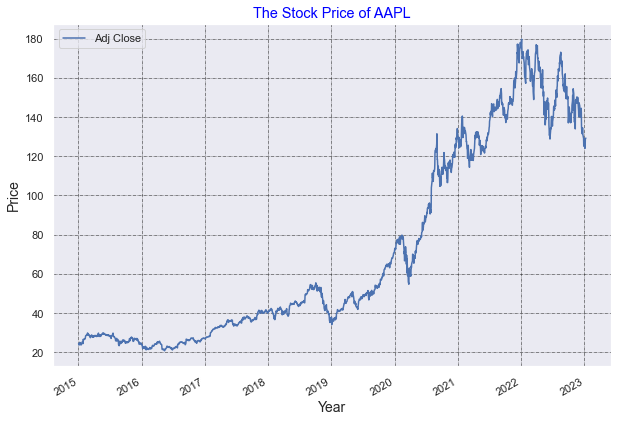

In [2]:

ticker = 'AAPL'
startDate = "2015-01-01"
endDate = "2023-01-10"



trader = TradingSystem()
trader.AddData(ticker, startDate, endDate)
trader.SetStrategy(BasicStrategy())
trader.portfolio.SetInitialCash(10000)


 
   
trader.Run()
print(trader.portfolio)
print(trader.GetStats())



print('Starting Portfolio Value: %.2f' % trader.portfolio.initialCash)
print('Final Portfolio Value: %.2f' % trader.portfolio.cash)
PlotStockData(ticker, (trader.datas[ticker])['Adj Close'])




In [6]:

ticker = 'MSFT'
startDate = "2010-01-01"
endDate = "2012-01-10"

trader = TradingSystem()
trader.AddData(ticker, startDate, endDate)
trader.SetStrategy(SMACross())
trader.portfolio.SetInitialCash(10000)

   
trader.Run()
print(trader.portfolio)
print(trader.GetStats())



print('Starting Portfolio Value: %.2f' % trader.portfolio.initialCash)
print('Final Portfolio Value: %.2f' % trader.GetPortfolioValue())

[*********************100%%**********************]  1 of 1 completed
 52%|█████▏    | 263/509 [00:00<00:00, 1328.37it/s]

2010-01-28 00:00:00 buy order created
Order filled Ticker: MSFT Size:  1 Price:  29.899999618530273
2010-07-14 00:00:00 sell order created
Order filled Ticker: MSFT Size:  -1 Price:  25.5


100%|██████████| 509/509 [00:00<00:00, 1356.63it/s]

2011-08-05 00:00:00 buy order created
Order filled Ticker: MSFT Size:  1 Price:  25.020000457763672
Portfolio: 
Cash value: 9970.579999923706
Ticker:MSFT, Size:1

{'Total Return': -0.016800003051753443}
Starting Portfolio Value: 10000.00
Final Portfolio Value: 9998.32


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

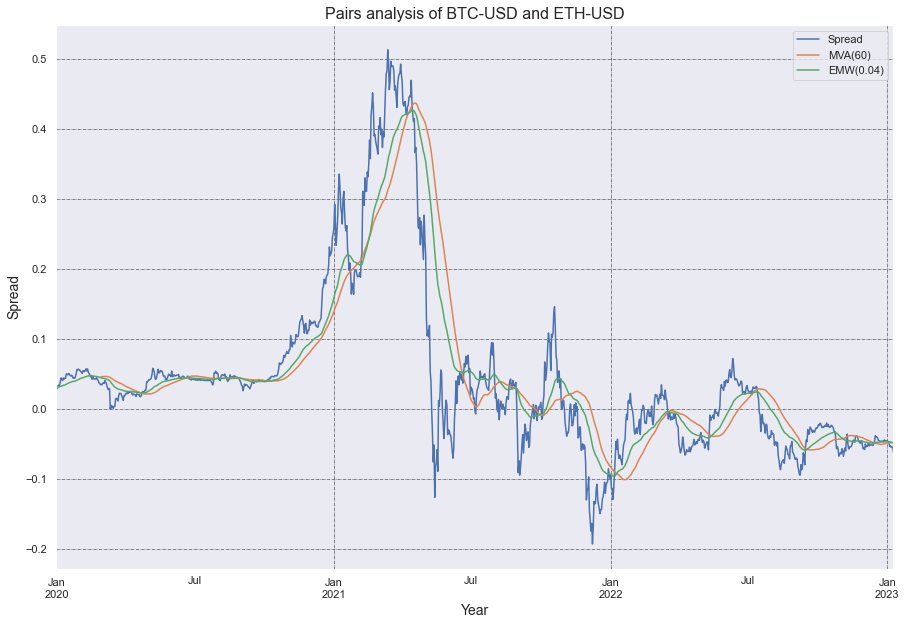

In [7]:


#  Given a pair of two assets, computes  the spread as well as  moving average and exponential moving average of the spread

def plotPairAnalysis(ticker1, ticker2, startDate,endDate):

    data = pd.DataFrame(columns=[ticker1, ticker2])
    tickers = [ticker1, ticker2]
    # Collect the data of both tickers and then normalize the data to the range [0,1] using MaxMin normalization
    for ticker in tickers:
        data[ticker] = yf.download(ticker, 
                                startDate,
                                endDate)['Adj Close']
        data[ticker + 'N'] = (data[ticker] - data[ticker].min()) / (data[ticker].max() - data[ticker].min())  

   
    # Compute the (linear) spread by taking the difference of the values
    data['Spread'] = data[ticker1 + 'N'] - data[ticker2 + 'N']
    # Compute moving average and exponential moving average
    data['MVA(60)'] = data['Spread'].rolling(window=60).mean() 
    data['EMW(0.04)'] = data['Spread'].ewm(alpha=0.04, adjust=False).mean()
    # Plot spread, moving average and exponential moving average in the same plot
    data[['Spread', 'MVA(60)','EMW(0.04)']].plot(figsize=(15, 10))
    # Show the legend
    plt.legend()
    # Define the label for the title of the figure
    plt.title("Pairs analysis of {} and {}".format(ticker1, ticker), fontsize=16)
    # Define the labels for x-axis and y-axis
    plt.ylabel('Spread', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    # Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()





tickers= ["BTC-USD", "ETH-USD"]

startDate = "2020-01-01"
endDate = "2023-01-10"

plotPairAnalysis(tickers[0], tickers[1],startDate,endDate)